In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import operator
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle

from pyemma.util.contexts import settings
from glob import glob

import MDAnalysis as mda
import MDAnalysis.analysis.hole
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.hole import HOLE, HOLEtraj

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [5]:
indir = '../1-Trajectories/5-CC-Hex2/'
topfile = '../1-Trajectories/5-CC-Hex2/ccHex2_dry.parm7'

traj_list = sorted(glob(indir+'/*_prod_dry.nc'))
traj_list

['../1-Trajectories/5-CC-Hex2/ccHex2_1_prod_dry.nc',
 '../1-Trajectories/5-CC-Hex2/ccHex2_2_prod_dry.nc',
 '../1-Trajectories/5-CC-Hex2/ccHex2_3_prod_dry.nc']

In [6]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile, stride=5)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

In [7]:
Y=[]
for i in range(0,len(results_open)):  
    Z=[]
    for j in range(0,len(results_open[i])):
        a=np.array([results_closed[i][j],results_open[i][j]])
        Z.append(a)
    Z=np.array(Z)
    Y.append(Z)
print(len(Y))
print(len(Y[0]))
print(len(Y[0][0]))

3
10000
2


In [8]:
Y_concat= np.concatenate(Y)

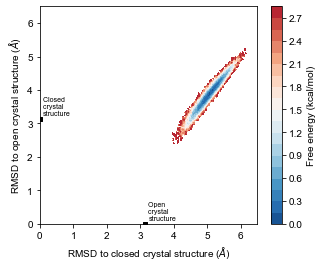

In [9]:
import seaborn as sns

diverging_colors = sns.color_palette("RdBu_r", 19)
sns_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[0:18])

fig, ax = plt.subplots(figsize=(5,4))



pyemma.plots.plot_free_energy(*Y_concat[:, :2].T,
                              nbins=100, ax=ax,
                              kT=0.5825, 
                              cbar=True,cmap=sns_cmap,ncontours=18,
                              cbar_label="Free energy (kcal/mol)")

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")


ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,6.5) , ylim=(0, 6.5))

ax.set_xticks(np.arange(0, 7,1))
ax.set_yticks(np.arange(0, 7, 1))

ax.set_aspect('equal')

fig.savefig('./plots/4-ccHex2/2_initial_FES.png', dpi=600)

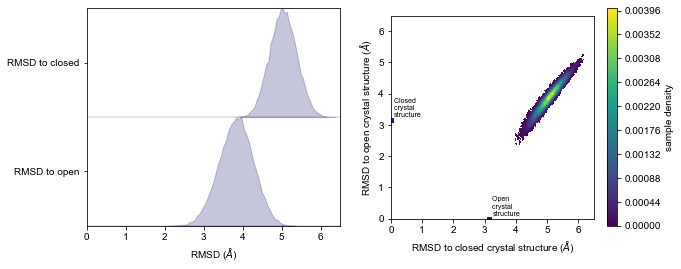

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    Y_concat,
    ax=axes[0],
    feature_labels=[r'RMSD to closed', r'RMSD to open'],
    ylog=False, color="midnightblue")


axes[0].set_xlabel(r'RMSD ($\AA$)')

axes[0].set(xlim=(0,6.5))

axes[0].set_xticks(np.arange(0, 7, 1))

pyemma.plots.plot_density(*Y_concat[:, :2].T, ax=axes[1], logscale=False, nbins=100, alpha=1)

axes[1].scatter(x=0.0, y=3.1458, s=20, c="midnightblue", marker="s")
axes[1].scatter(x=3.1458, y=0.0, s=20, c="midnightblue", marker="s")


axes[1].text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
axes[1].text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)

axes[1].set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
axes[1].set_ylabel(r'RMSD to open crystal structure ($\AA$)')

axes[1].set(xlim=(0,6.5) , ylim=(0, 6.5))

axes[1].set_xticks(np.arange(0, 7, 1))
axes[1].set_yticks(np.arange(0, 7, 1))
axes[1].set_aspect('equal')

fig.savefig('./plots/4-ccHex2/1_density.png', dpi=600)

In [13]:
ref=pt.load('../1-Trajectories/5-CC-Hex2/ccHex2_dry.rst7',
               '../1-Trajectories/5-CC-Hex2/ccHex2_dry.parm7')
results_ccHex2=[]
for t in traj_list:
    traj=pt.load(t, topfile, stride=5)
    rmsd=pt.rmsd(traj,ref=ref, mask="@CA,N,C,O")
    results_ccHex2.append(rmsd)

In [14]:
results_ccHex2

[array([4.49048538, 5.02000987, 5.41469402, ..., 4.71057989, 4.82338847,
        3.98944012]),
 array([4.98521673, 4.70418847, 4.93664273, ..., 5.20936961, 5.00320351,
        5.23476481]),
 array([4.68625761, 4.34207953, 4.48813723, ..., 4.48405989, 4.42251661,
        4.45889765])]

In [20]:
time=np.arange(0,1000, 0.1)
time

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.997e+02, 9.998e+02,
       9.999e+02])

[(0.0, 6.5), (0.0, 1000.0)]

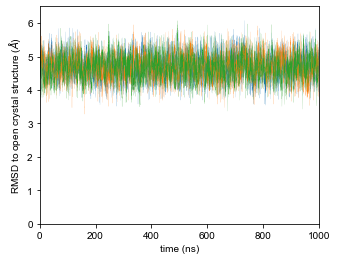

In [27]:
fig, ax = plt.subplots(figsize=(5,4))

for i in range(0,3):
    ax.plot(time, results_ccHex2[i], lw=0.1 #color=my_cmap_ipa[i],  
            )


ax.set_xlabel(r'time (ns)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set(xlim=(0,1000) , ylim=(0, 6.5))

In [28]:
def regularized_function(x, y, func, bins=100, range=None):
    """Compute *func()* over data aggregated in bins.
    ``(x,y) --> (x', func(Y'))``  with ``Y' = {y: y(x) where x in x' bin}``
    First the data is collected in bins x' along x and then *func* is
    applied to all data points Y' that have been collected in the bin.
    .. function:: func(y) -> float
       *func* takes exactly one argument, a numpy 1D array *y* (the
       values in a single bin of the histogram), and reduces it to one
       scalar float.
    .. Note:: *x* and *y* must be 1D arrays.
    :Arguments:
       x
          abscissa values (for binning)
       y
          ordinate values (func is applied)
       func
          a numpy ufunc that takes one argument, func(Y')
       bins
          number or array
       range
          limits (used with number of bins)
    :Returns:
       F,edges
          function and edges (``midpoints = 0.5*(edges[:-1]+edges[1:])``)
    (This function originated as
    :func:`recsql.sqlfunctions.regularized_function`.)
    """
    _x = np.asarray(x)
    _y = np.asarray(y)

    if len(_x.shape) != 1 or len(_y.shape) != 1:
        raise TypeError("Can only deal with 1D arrays.")

    # setup of bins (taken from numpy.histogram)
    if (range is not None):
        mn, mx = range
        if (mn > mx):
            raise AttributeError('max must be larger than min in range parameter.')

    if not np.iterable(bins):
        if range is None:
            range = (_x.min(), _x.max())
        mn, mx = [float(mi) for mi in range]
        if mn == mx:
            mn -= 0.5
            mx += 0.5
        bins = np.linspace(mn, mx, bins+1, endpoint=True)
    else:
        bins = np.asarray(bins)
        if (np.diff(bins) < 0).any():
            raise ValueError('bins must increase monotonically.')

    sorting_index = np.argsort(_x)
    sx = _x[sorting_index]
    sy = _y[sorting_index]

    # boundaries in SORTED data that demarcate bins; position in bin_index is the bin number
    bin_index = np.r_[sx.searchsorted(bins[:-1], 'left'),
                         sx.searchsorted(bins[-1], 'right')]

    # naive implementation: apply operator to each chunk = sy[start:stop] separately
    #
    # It's not clear to me how one could effectively block this procedure (cf
    # block = 65536 in numpy.histogram) because there does not seem to be a
    # general way to combine the chunks for different blocks, just think of
    # func=median
    F = np.zeros(len(bins)-1)  # final function
    F[:] = [func(sy[start:stop]) for start,stop in zip(bin_index[:-1],bin_index[1:])]
    return F,bins

In [29]:
def hole_calc(topfile, t, step):
    clust = mda.Universe(topfile, t)
    H_clust = HOLEtraj(clust , step=step, endrad=5, sample=0.1, cvect=[0,0,1], \
                 executable="/home/el14718/Software/hole2/exe/hole")  # set path to your hole binary
    H_clust.run()
    
    rxncoord = np.concatenate([profile.rxncoord for frame, profile in H_clust.sorted_profiles_iter()])
    radii = np.concatenate([profile.radius for frame, profile in H_clust.sorted_profiles_iter()])

    mean_r, q = regularized_function(rxncoord, radii, np.mean, bins=100)
    std_r, q = regularized_function(rxncoord, radii, np.std, bins=100)
    zeta = 0.5*(q[1:] + q[:-1])
    
    return zeta, mean_r,std_r

In [31]:
zeta_list=[]
mean_r_list=[]
std_r_list=[]

for t in traj_list:
    zeta, mean_r,std_r=hole_calc(topfile, t, 100)
    zeta_list.append(zeta)
    mean_r_list.append(mean_r)
    std_r_list.append(std_r)
    print(t[-13]+" done!")

1 done!
2 done!
3 done!
